# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

# Caminho absoluto até a pasta onde as subpastas estão localizadas
pastaArquivos = Path("/Users/matheuspassossilva/Library/CloudStorage/Dropbox/GitHub/analise-dados-pandas-sql/arquivos")

# Caminhos para os arquivos CSV - NÃO UTILIZADOS, OPTOU-SE POR ABRI-LOS DIRETAMENTE
# arquivoObesidade = pastaArquivos / "obesity_cleaned.csv"
# arquivoPIB = pastaArquivos / "gdp.csv"

dfObesidade = pd.read_csv(pastaArquivos / "obesity_cleaned.csv", index_col=0)
dfGDP = pd.read_csv(pastaArquivos / "gdp.csv")

In [2]:
dfObesidade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24570 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      24570 non-null  object
 1   Year         24570 non-null  int64 
 2   Obesity (%)  24570 non-null  object
 3   Sex          24570 non-null  object
dtypes: int64(1), object(3)
memory usage: 959.8+ KB


In [3]:
dfObesidade.columns

Index(['Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

In [4]:
dfObesidade

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


## Perguntas - Obesity among adults by country, 1975-2016

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [5]:
dfObesidade["Obesity (%)"].iloc[0]

'0.5 [0.2-1.1]'

In [6]:
dfObesidade["Obesity (%)"].value_counts()

Obesity (%)
No data            504
0.4 [0.1-1.0]       55
0.6 [0.2-1.3]       47
0.3 [0.1-0.7]       46
0.3 [0.1-0.8]       46
                  ... 
9.5 [6.7-13.1]       1
4.4 [2.2-7.6]        1
14.1 [9.1-20.3]      1
9.8 [6.9-13.4]       1
4.7 [2.5-8.0]        1
Name: count, Length: 16375, dtype: int64

In [7]:
dfObesidade.columns

Index(['Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

In [8]:
dfObesidade["Obesity"] = dfObesidade["Obesity (%)"].apply(lambda x: x.split()[0])

In [9]:
dfObesidade["Obesity"]

0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: Obesity, Length: 24570, dtype: object

In [10]:
dfObesidade.loc[dfObesidade["Obesity"] == "No", "Obesity"] = np.nan

In [11]:
dfObesidade["Obesity"] = dfObesidade["Obesity"].dropna()

In [12]:
dfObesidade["Obesity"] = dfObesidade["Obesity"].apply(lambda x: float(x))
dfObesidade["Year"] = dfObesidade["Year"].apply(lambda x: int(x))

In [13]:
dfObesidade

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


In [14]:
dfObesidade.set_index("Year", inplace=True)

In [15]:
dfObesidade[["Country", "Sex"]] = dfObesidade[["Country", "Sex"]].apply(lambda x: x.astype("string"))

In [16]:
dfObesidade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24570 entries, 1975 to 2016
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      24570 non-null  string 
 1   Obesity (%)  24570 non-null  object 
 2   Sex          24570 non-null  string 
 3   Obesity      24066 non-null  float64
dtypes: float64(1), object(1), string(2)
memory usage: 959.8+ KB


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [17]:
# df2015Homem = dfObesidade[dfObesidade["Year"] == 2015]
dfObesidade[dfObesidade.index == 2015].groupby("Sex").mean(numeric_only=True)

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [18]:
dfObesidadeStart = dfObesidade[dfObesidade.index == 1975]
dfObesidadeEnd = dfObesidade[dfObesidade.index == 2016]

In [19]:
dfObesidadeStart.set_index("Country", inplace=True)
dfObesidadeEnd.set_index("Country", inplace=True)

In [20]:
dfObesidadeEv = dfObesidadeEnd[dfObesidadeEnd["Sex"] == "Both Sexes"]["Obesity"] - dfObesidadeStart[dfObesidadeStart["Sex"] == "Both Sexes"]["Obesity"]

In [21]:
dfObesidadeEv.sort_values().dropna().head(5)

Series([], Name: Obesity, dtype: float64)

In [22]:
dfObesidadeEv.sort_values().dropna().tail(5)

Series([], Name: Obesity, dtype: float64)

In [23]:
dfObesidadeEnd[dfObesidadeEnd.index == "Tuvalu"]

,Obesity (%),Sex,Obesity
Country,,,
Tuvalu,51.6 [45.0-57.9],Both sexes,51.6
Tuvalu,47.0 [37.7-56.4],Male,47.0
Tuvalu,56.2 [47.3-64.4],Female,56.2


- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [24]:
df2015 = dfObesidade[dfObesidade.index == 2015]
df2015[df2015["Obesity"] == df2015["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [25]:
dfBrasil = dfObesidade[dfObesidade["Country"] == "Brazil"]

<Axes: xlabel='Year'>

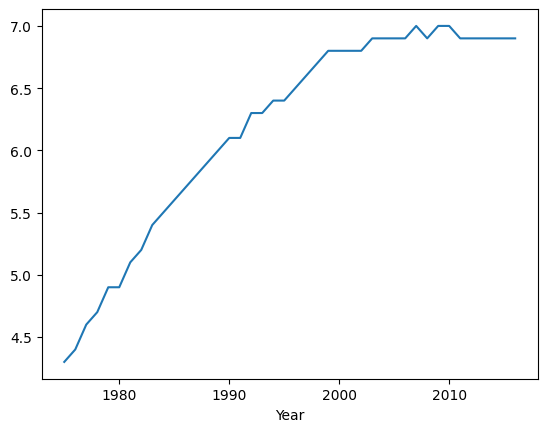

In [26]:
(dfBrasil[dfBrasil["Sex"] == "Female"]["Obesity"] - dfBrasil[dfBrasil["Sex"] == "Male"]["Obesity"]).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<Axes: xlabel='Year'>

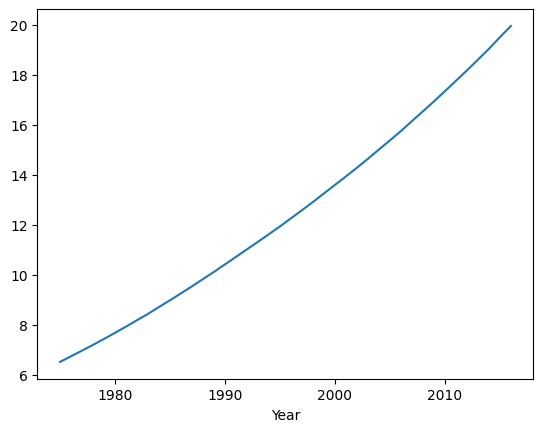

In [27]:
dfBoth = dfObesidade[dfObesidade["Sex"] == "Both sexes"]
dfBoth.groupby("Year")["Obesity"].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [28]:
dfGDP

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [29]:
dfGDP["Year"]

0       1/1/1901
1       1/1/1906
2       1/1/1911
3       1/1/1916
4       1/1/1921
          ...   
4414    1/1/1991
4415    1/1/1996
4416    1/1/2001
4417    1/1/2006
4418    1/1/2011
Name: Year, Length: 4419, dtype: object

In [30]:
dfGDP["Year"].iloc[0]

'1/1/1901'

In [31]:
dfGDP["Year"] = dfGDP["Year"].apply(lambda x: int(x.split("/")[-1]))

In [32]:
dfGDP.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

In [33]:
dfGDP

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [34]:
dfGDP[" GDP_pp "].iloc[0]

' 613.99 '

In [35]:
dfGDP["GDP_PP"] = dfGDP[" GDP_pp "].apply(lambda x: float(x.split()[0].replace(",", "")))

In [36]:
del dfGDP[" GDP_pp "]

In [37]:
dfGDP

,Country,Region,Year,GDP_PP
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


- Você conseguiria informar o primeiro valor registrado de cada país?

In [38]:
dfGDP.groupby("Country")["Year"].min()

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [39]:
dfGDP.groupby("Country")["Year"].min().max()

1991

In [40]:
dfGDP.groupby("Country")["Year"].min().value_counts()

Year
1901    192
1991      1
Name: count, dtype: int64

In [41]:
dfGDP.groupby("Country")["Year"].min()[dfGDP.groupby("Country")["Year"].min() == 1991]

Country
Kosovo    1991
Name: Year, dtype: int64

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [42]:
dfGDP[dfGDP["Year"] < 2000].max()

Country              Zimbabwe
Region     Sub-Saharan Africa
Year                     1996
GDP_PP               118681.3
dtype: object

In [43]:
dfGDPStart = dfGDP[dfGDP["Year"] == 1901]
dfGDPEnd = dfGDP[dfGDP["Year"] == 1996]

In [44]:
((dfGDPEnd.groupby("Region")["GDP_PP"].mean() / dfGDPStart.groupby("Region")["GDP_PP"].mean() - 1) * 100).sort_values()

Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name: GDP_PP, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [45]:
arrayAno = np.arange(dfGDP["Year"].min(), dfGDP["Year"].max())
dfTodosAnos = pd.DataFrame(arrayAno, columns=["Year"])
dfTodosAnos.index = dfTodosAnos["Year"]
dfAnosOff = ~dfTodosAnos["Year"].isin(dfGDP["Year"])
dfAnosOff

Year
1901    False
1902     True
1903     True
1904     True
1905     True
        ...  
2006    False
2007     True
2008     True
2009     True
2010     True
Name: Year, Length: 110, dtype: bool

In [46]:
dfAnosOff = dfTodosAnos.loc[dfAnosOff].index
dfAnosOff

Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930,
       1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942, 1943, 1944, 1945,
       1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960,
       1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990,
       1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010],
      dtype='int64', name='Year')

In [47]:
dfGDP = dfGDP.sort_values(["Country", "Year"])
dfGDP["deltaGDP"] = dfGDP["GDP_PP"] - dfGDP["GDP_PP"].shift(1)
dfGDP["deltaAno"] = dfGDP["Year"] - dfGDP["Year"].shift(1)
dfGDP

,Country,Region,Year,GDP_PP,deltaGDP,deltaAno
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0
...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0


In [48]:
dfGDP["GDPporAno"] = (dfGDP["deltaGDP"] / dfGDP["deltaAno"]).shift(-1)
dfGDP

,Country,Region,Year,GDP_PP,deltaGDP,deltaAno,GDPporAno
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094
...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232


In [49]:
dfGDP["ProximoAno"] = dfGDP["Year"].shift(-1)
del dfGDP["deltaGDP"], dfGDP["deltaAno"]
dfGDP.head(5)

,Country,Region,Year,GDP_PP,GDPporAno,ProximoAno
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [50]:
dfNovosDados = pd.DataFrame()
for idx, row in dfGDP.iterrows():
    if row["Year"] == 2011:
        continue
    anosParaAdicionar = dfAnosOff[(dfAnosOff < row["ProximoAno"]) & (dfAnosOff > row["Year"])]
    for novoAno in anosParaAdicionar:
        addRow = row.copy()
        addRow["GDP_PP"] = (novoAno - addRow["Year"]) * addRow["GDPporAno"] + addRow["GDP_PP"]
        addRow["Year"] = novoAno
        addRow["kind"] = "estimated"
        dfNovosDados = pd.concat([dfNovosDados, addRow.to_frame().transpose()])

In [51]:
dfNovosDados

,Country,Region,Year,GDP_PP,GDPporAno,ProximoAno,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [52]:
dfGDP = pd.concat([dfGDP, dfNovosDados])
dfGDP.sort_values(["Country", "Year"], inplace=True)
dfGDP.index = dfGDP["Year"]

In [55]:
dfGDP["kind"] = dfGDP["kind"].fillna("real")
dfGDP

,Country,Region,Year,GDP_PP,GDPporAno,ProximoAno,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


<Axes: xlabel='Year', ylabel='GDP_PP'>

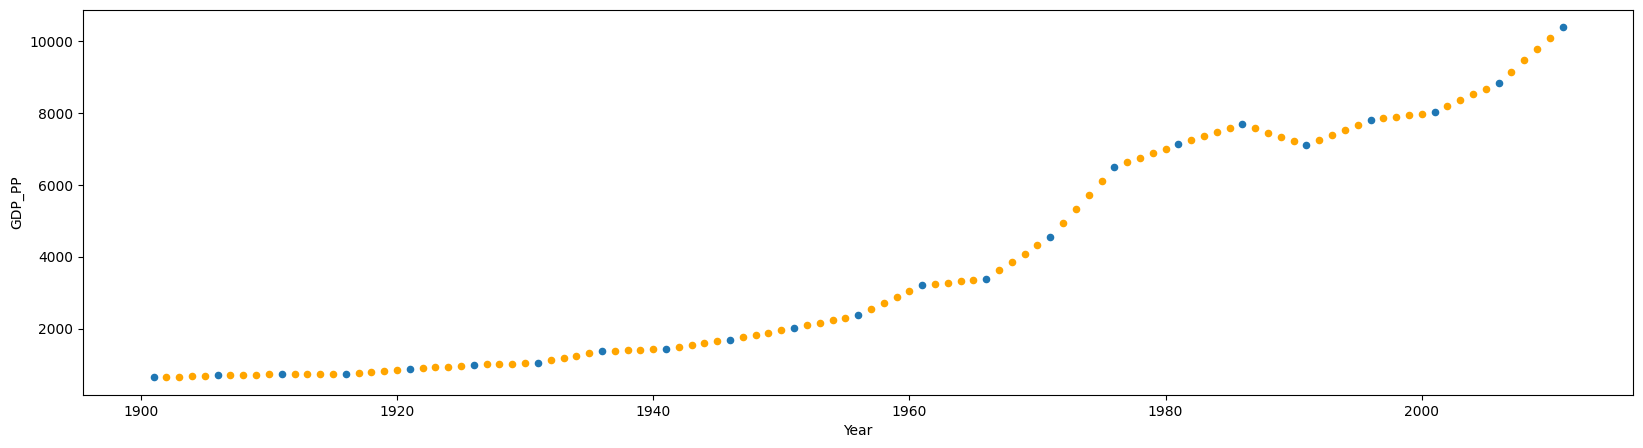

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
country = "Brazil"
dfGDP[(dfGDP["kind"] == "real") & (dfGDP["Country"] == country)].plot(kind="scatter", y="GDP_PP", x="Year", ax=ax)
dfGDP[(dfGDP["kind"] == "estimated") & (dfGDP["Country"] == country)].plot(kind="scatter", y="GDP_PP", x="Year", ax=ax, color="orange")

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [57]:
dfGDP["Year"] = dfGDP["Year"].astype(int)
dfGDP["GDP_PP"] = dfGDP["GDP_PP"].astype(float)

In [58]:
import plotly.express as px
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [60]:
dict_iso_alpha = df.set_index("country").to_dict()["iso_alpha"]
dict_num = {j: i for i, j in enumerate(dfGDP["Country"].unique())}

In [61]:
dfGDP["iso_alpha"] = dfGDP["Country"].map(dict_iso_alpha)
dfGDP["iso_num"] = dfGDP["Country"].map(dict_num)

fig = px.choropleth(dfGDP[dfGDP["kind"] == "real"].reset_index(drop=True), locations="iso_alpha", color="GDP_PP", hover_name="Country", animation_frame="Year")

fig.update_layout(height=600)
fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [63]:
dfObesidade["country_year"] = dfObesidade["Country"] + "-" + dfObesidade.reset_index()["Year"].apply(lambda x: str(int(x))).values
dict_obesity_year = dfObesidade.set_index("country_year").to_dict()["Obesity"]

dfGDP["country_year"] = dfGDP["Country"] + "-" + dfGDP["Year"].apply(lambda x: str(int(x))).values
dfGDP["Obesity"] = dfGDP["country_year"].map(dict_obesity_year)
dfGDP

,Country,Region,Year,GDP_PP,GDPporAno,ProximoAno,kind,iso_alpha,iso_num,country_year,Obesity
Year,,,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990,2.01,1906.0,real,AFG,0,Afghanistan-1901,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000,2.01,1906.0,estimated,AFG,0,Afghanistan-1902,NaN
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010,2.01,1906.0,estimated,AFG,0,Afghanistan-1903,NaN
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020,2.01,1906.0,estimated,AFG,0,Afghanistan-1904,NaN
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030,2.01,1906.0,estimated,AFG,0,Afghanistan-1905,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2009,22.2


In [64]:
dfGDPLimpo = dfGDP.dropna()

In [65]:
dfGDPLimpo.reset_index(drop=True).groupby("Year")[["Obesity", "GDP_PP"]].mean().corr()

,Obesity,GDP_PP
Obesity,1.000000,0.969378
GDP_PP,0.969378,1.000000
